In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sb
import sys

sys.path.append("..")

import utils.getStockData as stockData

# Stocks Overall

In [3]:
stocks = ["AAPL", "CAH", "CMCSA", "DISH", "GOOG", "HSY", "JNJ", "JPM", "K", "MA", "NFLX", "UL", "WBA"]
startDate = '2017-11-30'
endDate = '2022-03-18'

In [30]:
data = stockData.getMultipleStocks(stocks, startDate, endDate)
data.columns =  stocks
data = data[1:]

## Tech Companies

In [5]:
stocks_tech = ["AAPL", "GOOG"]

tech = stockData.getMultipleStocks(stocks_tech, startDate, endDate)
tech.columns =  stocks_tech
tech = tech[1:]
tech.describe()

,AAPL,GOOG
count,52.000000,52.000000
mean,87.777622,1625.775895
std,44.107831,638.094638
min,38.541548,1035.696187
25%,47.816039,1147.479051
50%,68.613987,1322.573313
75%,127.957500,2061.972795
max,173.552727,2948.650484


## Finance Companies

In [6]:
stocks_fin = ["JPM", "MA"]

fin = stockData.getMultipleStocks(stocks_fin, startDate, endDate)
fin.columns =  stocks_fin
fin = fin[1:]
fin.describe()

,JPM,MA
count,52.000000,52.000000
mean,122.829863,280.695840
std,22.596873,69.101327
min,91.523499,150.442499
25%,107.370822,214.583753
50%,113.701079,282.825001
75%,137.947969,339.013864
max,168.229048,381.090953


## F&B Companies

In [7]:
stocks_fb = ["UL", "K", "HSY"]

fb = stockData.getMultipleStocks(stocks_fb, startDate, endDate)
fb.columns =  stocks_fb
fb = fb[1:]
fb.describe()

,UL,K,HSY
count,52.000000,52.000000,52.000000
mean,56.322318,63.686150,139.954198
std,3.566063,4.117641,30.853115
min,45.467143,55.174000,91.807727
25%,53.428564,61.921591,110.179003
50%,55.827857,63.719226,144.028408
75%,59.267228,66.050136,155.872100
max,62.436364,72.985789,207.187145


## Entertainment Companies

In [8]:
stocks_ent = ["CMCSA", "NFLX", "DISH"]

ent = stockData.getMultipleStocks(stocks_ent, startDate, endDate)
ent.columns =  stocks_ent
ent = ent[1:]
ent.describe()

,CMCSA,NFLX,DISH
count,52.000000,52.000000,52.000000
mean,44.079582,408.781000,35.055876
std,7.465438,111.473552,5.619099
min,31.800454,187.854501,22.120952
25%,37.611171,330.106186,31.794796
50%,43.659524,370.067068,34.259156
75%,49.643289,500.369775,37.926052
max,59.072273,667.524286,49.111000


## Health Companies

In [9]:
stocks_health= ["JNJ", "CAH", "WBA"]

health = stockData.getMultipleStocks(stocks_health, startDate, endDate)
health.columns =  stocks_health
health = health[1:]
health.describe()

,JNJ,CAH,WBA
count,52.000000,52.000000,52.000000
mean,146.169971,53.044780,55.291503
std,14.638695,5.649883,11.516231
min,122.277619,43.570454,35.901428
25%,134.425376,49.196692,47.762481
50%,143.976645,52.745952,52.956273
75%,161.727519,54.462468,64.552976
max,175.105001,70.193334,81.820476


--> Each industries have companies whose stocks lie in different ranges, so these are suitable stocks that can help create not too biased portfolios

# Time series graphs

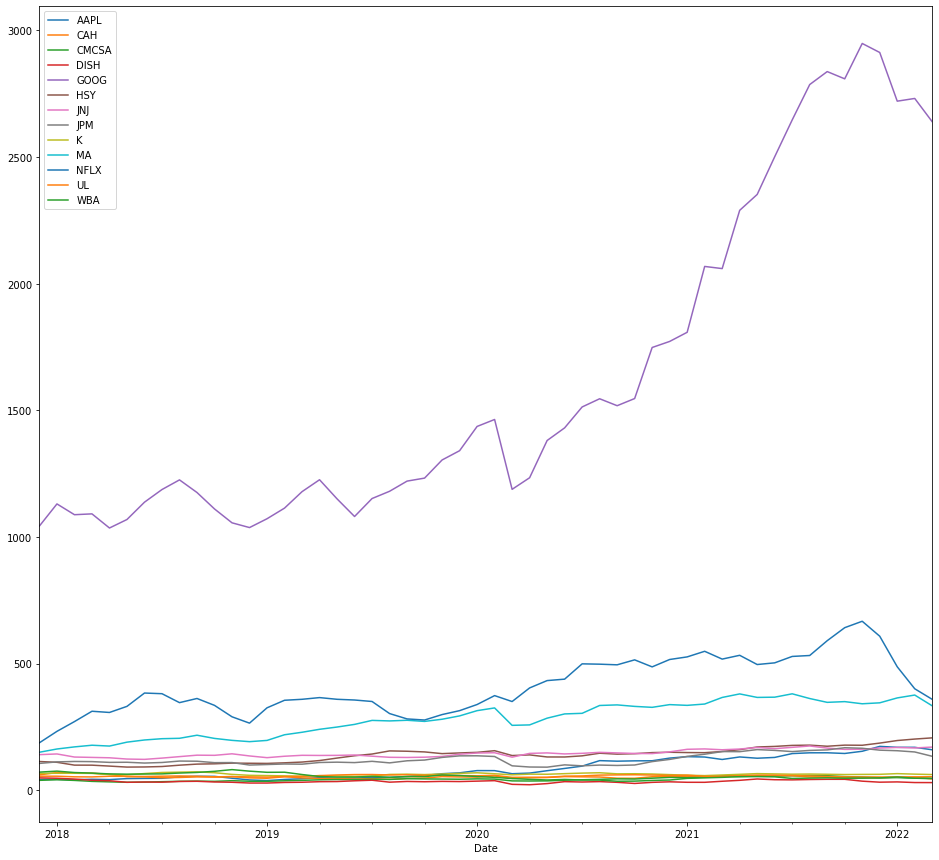

In [10]:
data.plot(figsize=(16, 15))
plt.show()

--> The tech industries seem to do best in terms of stocks (1st is Google, 2nd is Apple). There's a high chance that tech companies will take more proportion than others in our portfolios

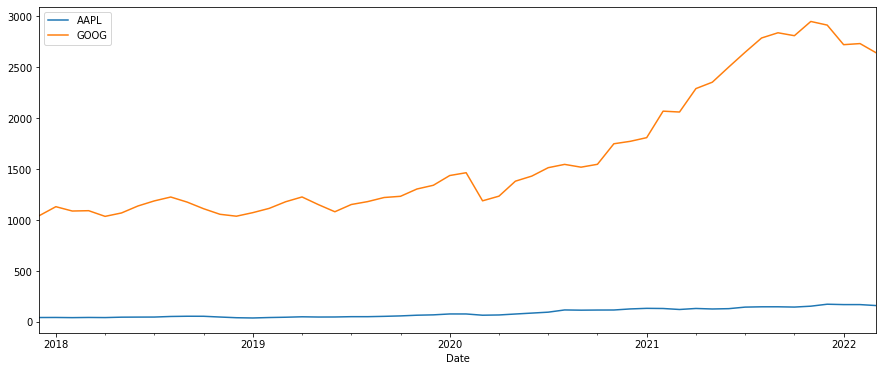

In [11]:
tech.plot(figsize=(15, 6))
plt.show()

--> Google observes tremendous growth while Apple have a more stable growth

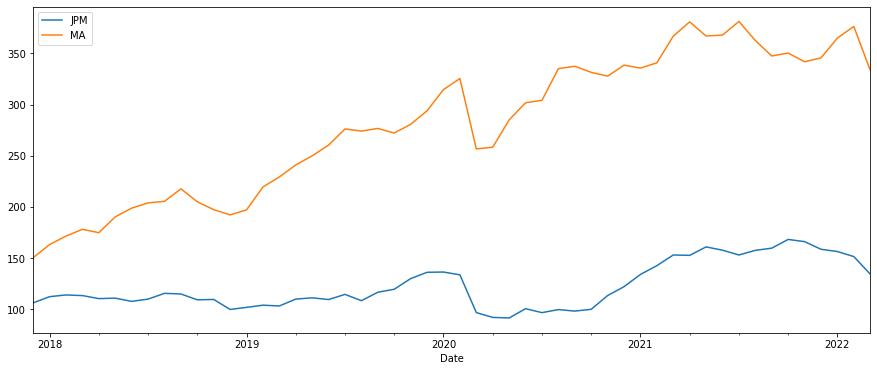

In [12]:
fin.plot(figsize=(15, 6))
plt.show()

--> Both JPMorgan and Mastercard experience increasing stock price

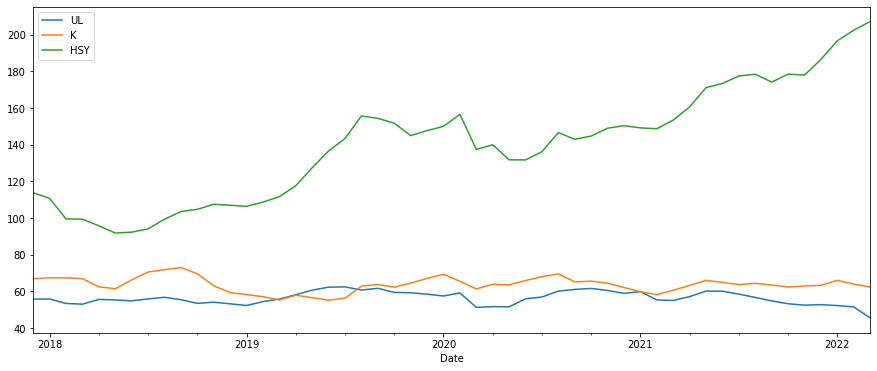

In [13]:
fb.plot(figsize=(15, 6))
plt.show()

--> Hershey rises through the 5 years period, while Unilever and Kellogg stay stable and have a slight decrease at the end

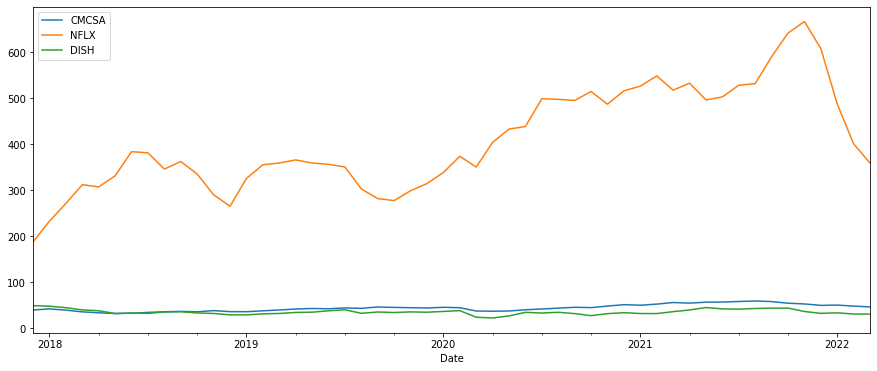

In [14]:
ent.plot(figsize=(15, 6))
plt.show()

--> Netflix seems to be successful but oddly experience a plunge in 2022. DISH and Comcast have few fluctuations

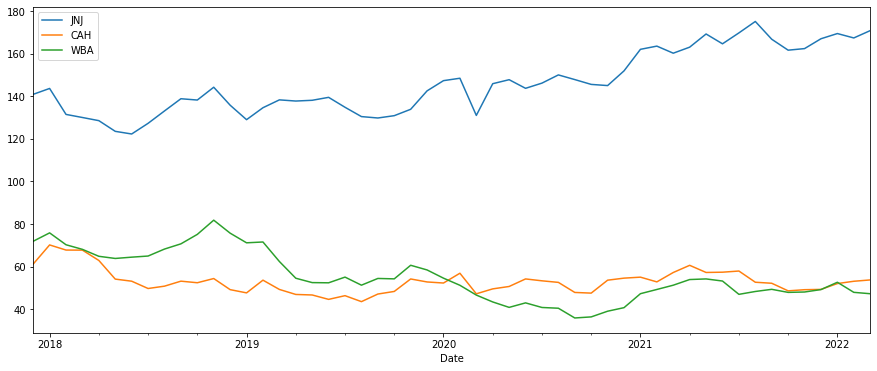

In [15]:
health.plot(figsize=(15, 6))
plt.show()

--> Johnson & Johnson performs best in stocks as it keeps a high price and keeps increasing. On the other hand, Walgreen Boots Alliance has slight decrease through the years, while Cardinal Health stays stable.

# Correlation within the same industry

In [21]:
tech_corr = tech.corr()
print(tech_corr)

          AAPL      GOOG
AAPL  1.000000  0.946321
GOOG  0.946321  1.000000


In [22]:
fin_corr = fin.corr()
print(fin_corr)

          JPM        MA
JPM  1.000000  0.673527
MA   0.673527  1.000000


In [20]:
fb_corr = fb.corr()
print(fb_corr)

           UL         K       HSY
UL   1.000000 -0.062793 -0.012402
K   -0.062793  1.000000 -0.085617
HSY -0.012402 -0.085617  1.000000


In [23]:
ent_corr = ent.corr()
print(ent_corr)

          CMCSA      NFLX      DISH
CMCSA  1.000000  0.704042  0.395144
NFLX   0.704042  1.000000  0.006992
DISH   0.395144  0.006992  1.000000


In [24]:
health_corr = health.corr()
print(health_corr)

          JNJ       CAH       WBA
JNJ  1.000000  0.095588 -0.483808
CAH  0.095588  1.000000  0.346084
WBA -0.483808  0.346084  1.000000


--> In the stocks chosen, tech and fin have high correlation, ent has some correlation while fb and health have little

--> The more correlation, the less chance fin and tech companies will be chosen at the same time 

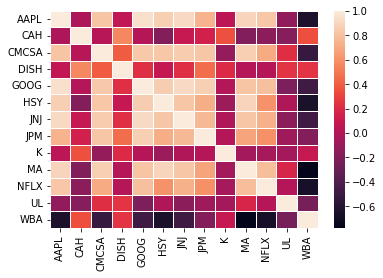

In [29]:
dataplot = sb.heatmap(data.corr(), linewidths=.5)

--> Those whose correlations have darker color (WBA vs MA, AAPL vs WBA...) have higher chance of appearing in the same portfolio

### *Question* When allocating, would the model choose higher price & increasing tickets such as JNJ, or tickets that have least correlations to others but low price and decreasing tickets like WBA?